tensorflow求解多元线性回归 
案例来自： 神经网络与深度学习——TensorFlow2.0实战 牟琦、李占利、张昭昭 
http://www.icourse163.org/learn/XUST-1206363802?tid=1206674203#/learn/announce

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
boston=keras.datasets.boston_housing

In [3]:
(x_train, y_train), (x_test, y_test)=boston.load_data()
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [4]:
train_x=x_train[:,5]
train_y=y_train
test_x=x_test[:,5]
test_y=y_test

In [5]:
lr=0.04
times=2000
display_step=200

In [6]:
np.random.seed(612)
w=tf.Variable(np.random.randn())
b=tf.Variable(np.random.randn())
train_mse=[]
test_mse=[]
for i in range(times+1):
    with tf.GradientTape() as tape:
        train_pred=train_x*w+b
        train_loss=tf.reduce_mean(tf.square(train_y-train_pred))*0.5
    
    test_pred=test_x*w+b
    test_loss=tf.reduce_mean(tf.square(test_y-test_pred))*0.5
    train_mse.append(train_loss)
    test_mse.append(test_loss)
    
    grad=tape.gradient(train_loss,[w,b])
    w.assign_sub(lr*grad[0])
    b.assign_sub(lr*grad[1])
    if i % display_step == 0:
        print("i",i,"train_loss",train_loss.numpy(),"test_loss",test_loss.numpy())

i 0 train_loss 321.8376 test_loss 337.56863
i 200 train_loss 28.122614 test_loss 26.237764
i 400 train_loss 27.144741 test_loss 25.099327
i 600 train_loss 26.34195 test_loss 24.141075
i 800 train_loss 25.6829 test_loss 23.332981
i 1000 train_loss 25.141851 test_loss 22.650158
i 1200 train_loss 24.69767 test_loss 22.072006
i 1400 train_loss 24.333025 test_loss 21.581432
i 1600 train_loss 24.03367 test_loss 21.164259
i 1800 train_loss 23.787905 test_loss 20.808695
i 2000 train_loss 23.586145 test_loss 20.504938


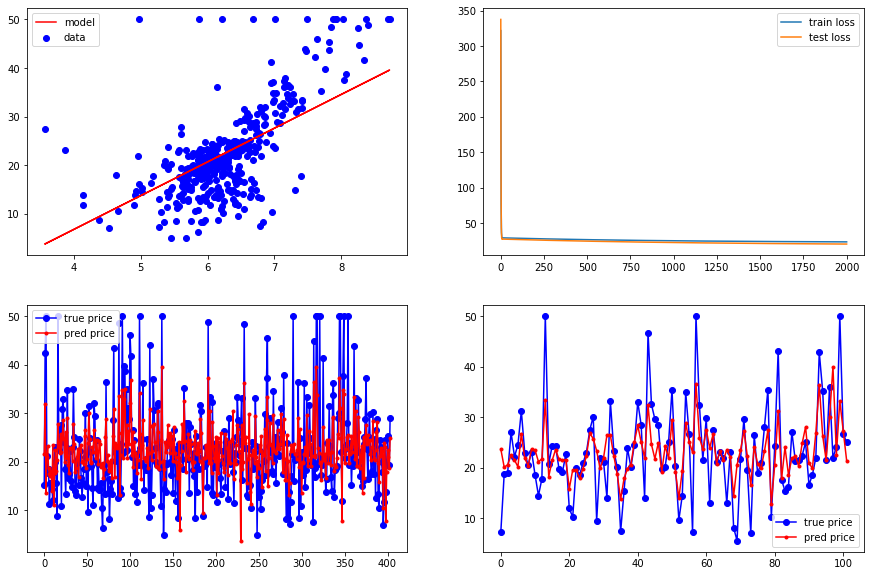

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.scatter(train_x,train_y,color="blue",label="data")
plt.plot(train_x,train_pred,color="red",label="model")
plt.legend()
plt.subplot(222)
plt.plot(train_mse,label="train loss")
plt.plot(test_mse,label="test loss")
plt.legend()
plt.subplot(223)
plt.plot(train_y,color="blue",marker="o", label="true price")
plt.plot(train_pred,color="red",marker=".", label="pred price")
plt.legend()
plt.subplot(224)
plt.plot(test_y,color="blue",marker="o",label="true price")
plt.plot(test_pred,color="red",marker=".",label="pred price")
plt.legend()
plt.show()